# Plot variables for Taylor Diagrams
- This script is used to plot variables from simulations and Taylor Diagram metrics;
- Simulations: TRAF and sensitity simulations at FR-Capitole and UK-Manchester. 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
import geocat.viz as gv
from matplotlib.lines import Line2D

In [18]:
labelfont = 14
linewidth = 1
labelcolor = '#6b6b6b'
padding = 8
pad = 1
xwidth = 1
length = 1
maintitles = ['LWup', 'Qh', 'Qle', 'Qtau']
lc1 = '#e41a1c'
lc2 = '#377eb8'
lc3 = '#4daf4a'
lc4 = '#984ea3'
colors = [lc1, lc2, lc3, lc4]
case_index = 'Index'
site_index = 'site'
var_index = 'Variable'
marker_sym = ['*', 'o', 'D']
data_list = []
marker_list = ['☆', '○', '◇', '1']
alpha = 0.5
season_list = ['summer', 'winter']
site_list = ['FR-Capitole', 'UK-MCR']
factor_list = ['add0.1', 'add0.2', 'add0.4', 'add0.8', 'sub0.1', 'sub0.2', 'sub0.4', 'sub0.8']
title_list = ['(a) FR-Capitole', '(b) UK-Manchester']
var_index='var'
case_index='factor'
markerline = 0.5
nrow = 1
ncol = 2
markersize= 45
var_list_list = [['$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$'],
                 ['$T_{air}$', 'RH']]


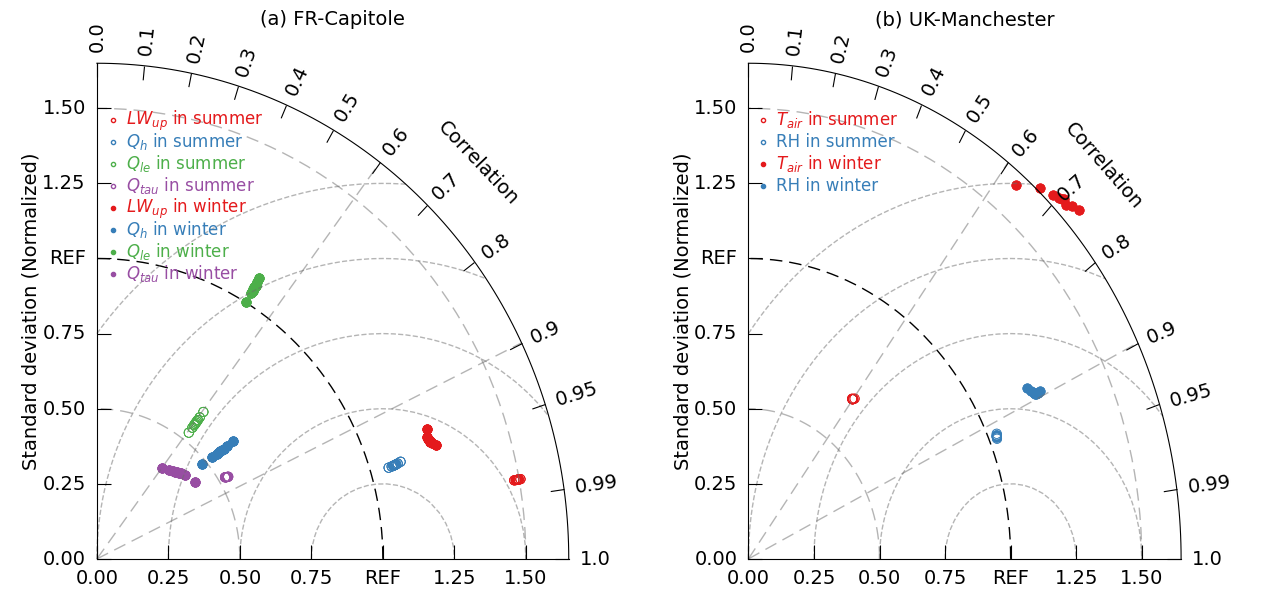

In [19]:
label_xloc_list = [0.1, 0.6]
label_yloc = 0.8
line=0.035
fig = plt.figure(figsize=(13, 6.25))
for i in range(nrow * ncol):
    site = site_list[i]
    da = gv.TaylorDiagram(refstd=1, fig=fig, rect=121+i, label='REF')
    da.set_fontsizes_and_pad(ticklabel_fontsize = labelfont, axislabel_fontsize=labelfont, axislabel_pad = 1)
    da.add_std_grid(np.array([0.5, 1.5]), color=labelcolor, linewidth=xwidth, alpha=alpha)
    da.add_corr_grid(np.array([0.6, 0.9]), color=labelcolor,linewidth=xwidth, alpha=alpha)
    da.add_contours(levels=np.arange(0, 1.5, 0.25), colors=labelcolor, linewidths=xwidth, alpha=alpha, **{'linestyles': '--'})  
    da.add_title(title_list[i], y_loc = 1.05, fontsize=labelfont)
    var_list = var_list_list[i]
    label_xloc = label_xloc_list[i]
    offset=line*len(var_list)
    for s in range(2):
        season = season_list[s]
        result = pd.read_csv(f'./data_for_figure/{site}_{season}_std_coef.csv')
        std_pivot_df = result.pivot(index=var_index, columns=case_index, values='sdev')
        cof_pivot_df = result.pivot(index=var_index, columns=case_index, values='coef')
        stddev = std_pivot_df.to_numpy()
        corrcoef = cof_pivot_df.to_numpy()
        for j in range(stddev.shape[0]): 
            color = colors[j]
            if s == 0:
                facecolors = 'none'
            else:
                facecolors = color    
            for m in range(stddev.shape[0]):
                da.add_model_set(stddev[j],
                         corrcoef[j],
                         #xytext=(-13.5, 24.5), # marker label location, in pixels
                         xytext=(-5, 10),
                         fontsize=labelfont-2,
                         color=color, # label color
                         annotate_on=False,
                         #label='Baseline',
                         facecolors=facecolors,
                         s=markersize,
                         linewidth=markerline)
        for q, var in enumerate(var_list):
            if s==0:
                markerfacecolor='none'
            else:
                markerfacecolor=colors[q]     
            fig.add_artist(Line2D([label_xloc], [label_yloc-offset*s - (line * q)], marker='o', markersize=3,
                          markeredgecolor=colors[q], markerfacecolor=markerfacecolor, linestyle='None', transform=fig.transFigure))
            fig.text(label_xloc+0.01, label_yloc-0.0075-offset*s - (line * q) , f'{var} in {season}', fontsize=12, color=colors[q])        
fig.subplots_adjust(left=0.075, right=0.95, bottom=0.015, top=0.975, wspace=0.25)
fig.savefig('taylor_sens.png', dpi=300)    
#fig.savefig('taylor_sens.pdf', dpi=600)             

# Description

In [21]:
df_fr_summer = pd.read_csv('./data_for_figure/FR-Capitole_summer_std_coef.csv')
df_fr_summer.head()

,factor,var,sdev,coef
0,add0.1,LWup,1.494638,0.984351
1,add0.1,Qh,1.089957,0.957761
2,add0.1,Qle,0.576348,0.606891
3,add0.1,Qtau,0.529857,0.857574
4,add0.2,LWup,1.496037,0.984351


In [25]:
df_fr_summer_lwup = df_fr_summer[df_fr_summer['var'] == 'LWup']
df_fr_summer_lwup['sdev'].mean(), df_fr_summer_lwup['sdev'].std()

(1.4933979224907574, 0.006337399057428054)

In [26]:
df_fr_summer_qtau = df_fr_summer[df_fr_summer['var'] == 'Qtau']
df_fr_summer_qtau['sdev'].mean(), df_fr_summer_qtau['sdev'].std()

(0.5291478413772213, 0.003055222332103555)

In [30]:
df_fr_summer_qle = df_fr_summer[df_fr_summer['var'] == 'Qle']
df_fr_summer_qle['sdev'].mean(), df_fr_summer_qle['sdev'].std(), df_fr_summer_qle['sdev'].max(), df_fr_summer_qle['sdev'].min()
df_fr_summer_qle

,factor,var,sdev,coef
2,add0.1,Qle,0.576348,0.606891
6,add0.2,Qle,0.581800,0.606844
10,add0.4,Qle,0.592643,0.606698
14,add0.8,Qle,0.614741,0.605650
18,sub0.1,Qle,0.565463,0.607017
22,sub0.2,Qle,0.560113,0.607081
26,sub0.4,Qle,0.549581,0.607240
30,sub0.8,Qle,0.529022,0.607580
34,traffic,Qle,0.570894,0.606958


In [31]:
df_fr_summer_qh = df_fr_summer[df_fr_summer['var'] == 'Qh']
df_fr_summer_qh['sdev'].mean(), df_fr_summer_qh['sdev'].std(), df_fr_summer_qh['sdev'].max(), df_fr_summer_qh['sdev'].min()
df_fr_summer_qh

,factor,var,sdev,coef
1,add0.1,Qh,1.089957,0.957761
5,add0.2,Qh,1.092812,0.957625
9,add0.4,Qh,1.098594,0.957319
13,add0.8,Qh,1.110059,0.956629
17,sub0.1,Qh,1.084280,0.957997
21,sub0.2,Qh,1.081443,0.958095
25,sub0.4,Qh,1.075763,0.958261
29,sub0.8,Qh,1.064442,0.958465
33,traffic,Qh,1.087114,0.957886


In [32]:
df_fr_winter = pd.read_csv('./data_for_figure/FR-Capitole_winter_std_coef.csv')
df_fr_winter.head()

,factor,var,sdev,coef
0,add0.1,LWup,1.229403,0.948229
1,add0.1,Qh,0.567523,0.770200
2,add0.1,Qle,1.064775,0.521068
3,add0.1,Qtau,0.405013,0.706032
4,add0.2,LWup,1.231118,0.948977


In [33]:
df_fr_winter_qh = df_fr_winter[df_fr_winter['var'] == 'Qh']
df_fr_winter_qh['sdev'].mean(), df_fr_winter_qh['sdev'].std(), df_fr_winter_qh['sdev'].max(), df_fr_winter_qh['sdev'].min()
df_fr_winter_qh

,factor,var,sdev,coef
1,add0.1,Qh,0.567523,0.770200
5,add0.2,Qh,0.574906,0.770379
9,add0.4,Qh,0.589290,0.770772
13,add0.8,Qh,0.617881,0.771373
17,sub0.1,Qh,0.552452,0.769179
21,sub0.2,Qh,0.544661,0.768215
25,sub0.4,Qh,0.526852,0.766444
29,sub0.8,Qh,0.485849,0.758007
33,traffic,Qh,0.560191,0.769834


In [13]:
df_uk_winter = pd.read_csv('./data_for_figure/UK-MCR_winter_std_coef.csv')
df_uk_winter.head()

,factor,var,sdev,coef
0,add0.1,TSA_U,1.223215,0.892974
1,add0.1,RH2M,1.696682,0.708327
2,add0.2,TSA_U,1.221285,0.891907
3,add0.2,RH2M,1.690326,0.716820
4,add0.4,TSA_U,1.215169,0.888011
5,add0.4,RH2M,1.702577,0.723995
6,add0.8,TSA_U,1.205993,0.881878
7,add0.8,RH2M,1.713696,0.735926
8,sub0.1,TSA_U,1.228761,0.893862
9,sub0.1,RH2M,1.684748,0.701908


In [15]:
df_uk_winter_rh = df_uk_winter[df_uk_winter['var'] == 'RH2M']
df_uk_winter_rh

,factor,var,sdev,coef
1,add0.1,RH2M,1.696682,0.708327
3,add0.2,RH2M,1.690326,0.716820
5,add0.4,RH2M,1.702577,0.723995
7,add0.8,RH2M,1.713696,0.735926
9,sub0.1,RH2M,1.684748,0.701908
11,sub0.2,RH2M,1.679958,0.692255
13,sub0.4,RH2M,1.660579,0.669742
15,sub0.8,RH2M,1.608306,0.633350
17,traffic,RH2M,1.692766,0.705815


In [8]:
df_uk_summer_output = pd.read_csv('./output/UK-MCR_summer.csv')
df_uk_summer_output

,time,TSA_U,RH2M,case
0,2022-07-16 01:00:00,14.820683,78.116904,obs
1,2022-07-16 02:00:00,14.249000,81.535228,obs
2,2022-07-16 03:00:00,14.028257,82.324458,obs
3,2022-07-16 04:00:00,13.129890,84.592587,obs
4,2022-07-16 05:00:00,13.460827,83.470497,obs
...,...,...,...,...
1675,2022-07-22 20:00:00,17.789581,87.901619,traffic
1676,2022-07-22 21:00:00,17.512848,81.212868,traffic
1677,2022-07-22 22:00:00,16.966187,87.982506,traffic
1678,2022-07-22 23:00:00,16.701813,95.856262,traffic


In [9]:
df_uk_summer_output.groupby('case')['TSA_U'].mean()

case
add0.1     21.466759
add0.2     21.481114
add0.4     21.509466
add0.8     21.561267
obs        21.825857
sub0.1     21.439040
sub0.2     21.425249
sub0.4     21.396406
sub0.8     21.334466
traffic    21.452166
Name: TSA_U, dtype: float64

In [10]:
df_uk_winter_output = pd.read_csv('./output/UK-MCR_winter.csv')
df_uk_winter_output

,time,TSA_U,RH2M,case
0,2022-12-10 01:00:00,3.315401,87.470427,obs
1,2022-12-10 02:00:00,3.053531,89.525121,obs
2,2022-12-10 03:00:00,3.144498,89.262644,obs
3,2022-12-10 04:00:00,3.216280,88.600749,obs
4,2022-12-10 05:00:00,3.020806,89.459400,obs
...,...,...,...,...
1675,2022-12-16 20:00:00,-0.887268,91.893471,traffic
1676,2022-12-16 21:00:00,-1.013641,93.479774,traffic
1677,2022-12-16 22:00:00,-1.105591,93.949303,traffic
1678,2022-12-16 23:00:00,-1.243439,94.467705,traffic


In [11]:
df_uk_winter_output.groupby('case')['TSA_U'].mean()

case
add0.1    -0.135839
add0.2    -0.118868
add0.4    -0.082929
add0.8    -0.013742
obs        1.224352
sub0.1    -0.175072
sub0.2    -0.194791
sub0.4    -0.234509
sub0.8    -0.323719
traffic   -0.155147
Name: TSA_U, dtype: float64

In [16]:
df_uk_winter_output.groupby('case')['RH2M'].mean()

case
add0.1     84.655522
add0.2     84.507365
add0.4     84.333026
add0.8     83.892238
obs        82.297784
sub0.1     84.881813
sub0.2     85.083664
sub0.4     85.378145
sub0.8     85.944558
traffic    84.775557
Name: RH2M, dtype: float64